Example on how to use the lithography package to print structures

In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import Au, Ag
from metamaterials import lithography as lt

# Parameters in mm
shrink_factor = 10
a = 0.85 * 1e-3 * shrink_factor
d = 0.45*a
t = 0.02 * 1e-3 * shrink_factor
geometry = [mp.Block(size=mp.Vector3(d, d, t), center=mp.Vector3(0, 0, -t/2), material=Ag)]

Using MPI version 4.0, 1 processes


/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/gridsan/mcomella/.conda/envs/pmp/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [6]:
l = .320 * 1e-3 * shrink_factor
w = .090 * 1e-3 * shrink_factor
a = .450 * 1e-3 * shrink_factor
gap = .070 * 1e-3 * shrink_factor
metal = Ag
geometry = [
    mp.Block(size=mp.Vector3(l, w, t), center=mp.Vector3(0, l/2-w/2, -t/2), material=metal),
    mp.Block(size=mp.Vector3(l, w, t), center=mp.Vector3(0, -l/2+w/2, -t/2), material=metal),
    mp.Block(size=mp.Vector3(w, l-2*w, t), center=mp.Vector3(l/2-w/2, 0, -t/2), material=metal),
    mp.Block(size=mp.Vector3(w, l-2*w, t), center=mp.Vector3(-l/2+w/2, 0, -t/2), material=metal),
    # mp.Block(size=mp.Vector3(gap, w, t), center=mp.Vector3(0, l/2-w/2, -t/2), material=mp.Medium(epsilon=1)), # Gap
]

In [7]:
M = lt.draw_metamaterial(geometry, a, 2, 2)

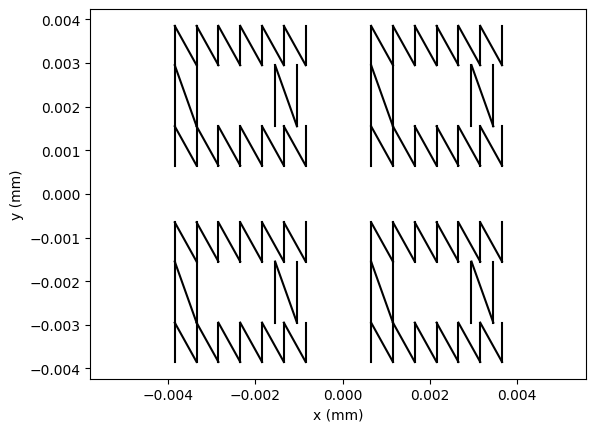

In [8]:
lt.plot_lithography(M)

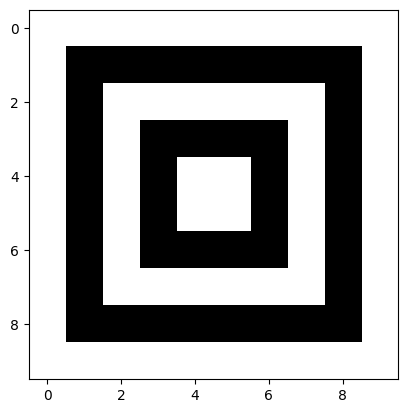

In [9]:
# Binary image examples
img = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 1, 1, 1, 1, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]
plt.imshow(img, cmap='gray')

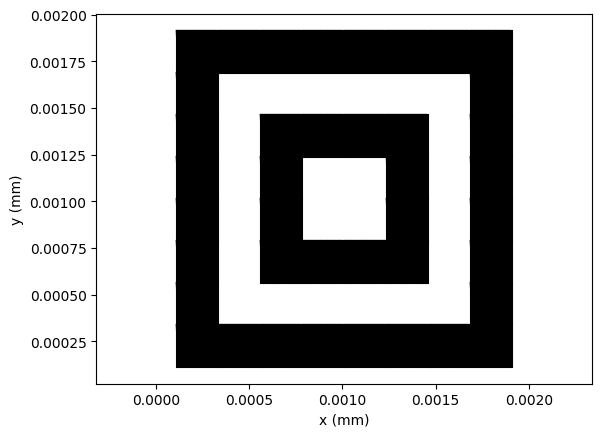

In [10]:
geometry = lt.img_to_geometry(img, scale=a/20)
M = lt.draw_metamaterial(geometry, a, 1, 1, dx=1e-5)
lt.plot_lithography(M)

In [9]:
from PIL import Image
img = Image.open('img/mario.png').convert('L')
img = np.array(img)

In [10]:
geom = lt.img_to_geometry(img, scale=a/20)

In [11]:
ML = lt.draw_metamaterial(geom, a, 1, 1, dx=1e-4)